# Predictive Thyroid Disease Project - Data Wrangling

To make a predictive model if the thyroid cancer patient is likely to respond to the treatment or not.

# Initial Set Up

In [1]:
# Import Common Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

# Import my custom library 
import MyCustDataSciLib as MyCustDataSciLib

In [2]:
# Load Data
file_path = "Thyroid_Disease.csv"
df = pd.read_csv(file_path)

In [3]:
# Display Info, number of rows, column names, and column data types
    # there are 383 entries and each columns's non null count are 383 so no null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [4]:
# Display the first few rows
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
# Display the last few rows
df.tail()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes
382,67,M,Yes,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


In [6]:
# get random sample of df 

'''
# Get random rows
df.sample(n=5, random_state=42)

# Get 10% of rows randomly
df.sample(frac=0.01,random_state=42)

# To get stratified sample based on a column
df.groupby('column_name').sample(n=2)

# get remaining samples
remaining = df.drop(sample.index)
'''

df.sample(n=5, random_state=42)

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
268,32,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Papillary,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
250,30,F,No,No,No,Subclinical Hypothyroidism,Normal,Right,Follicular,Uni-Focal,Low,T3a,N0,M0,I,Excellent,No
318,30,F,No,No,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,Intermediate,T3a,N1b,M0,I,Structural Incomplete,Yes
331,51,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Follicular,Uni-Focal,Intermediate,T3a,N0,M0,I,Structural Incomplete,Yes
56,43,F,No,Yes,No,Euthyroid,Single nodular goiter-right,No,Papillary,Uni-Focal,Low,T1b,N0,M0,I,Excellent,No


In [7]:
# Display basic statistical details
    # 'count' is useless but the rest of the descriptive statistics may be useful
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [8]:
# Get the shape of the DataFrame
print(df.shape)

(383, 17)


# Reshaping Data

In [9]:
# reshape
    # not needed
'''
melted_df = pd.melt(df, id_vars=['id'], value_vars=['col1', 'col2'])
pivoted_df = melted_df.pivot(index='id', columns='variable', values='value')
'''

"\nmelted_df = pd.melt(df, id_vars=['id'], value_vars=['col1', 'col2'])\npivoted_df = melted_df.pivot(index='id', columns='variable', values='value')\n"

# Handle Missing Data

In [10]:
# Check for missing values
    # I know already check for missing data with .info() but double check with .isnull() 
    # and looks like no null values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

<Axes: >

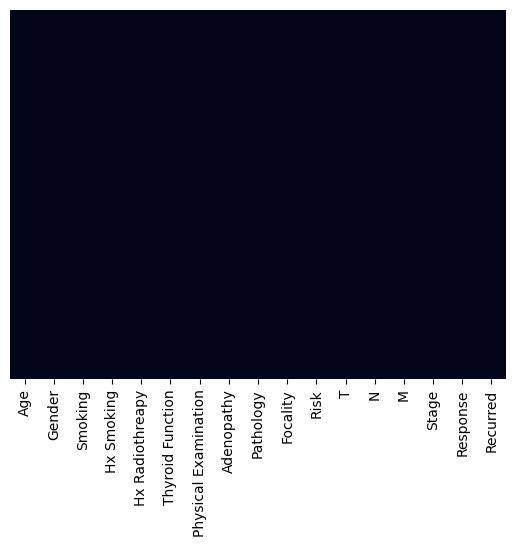

In [11]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# no null 

In [12]:
# fill in missing values
    # not needed as no missing values
'''
# Fill missing values with a specific value
df['column_name'].fillna(value, inplace=True)

# Fill missing values with the mean, median, or mode
df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Drop rows or columns with missing values
df.dropna(axis=0, inplace=True)  # Drop rows
df.dropna(axis=1, inplace=True)  # Drop columns

# functions from msno
'''

"\n# Fill missing values with a specific value\ndf['column_name'].fillna(value, inplace=True)\n\n# Fill missing values with the mean, median, or mode\ndf['column_name'].fillna(df['column_name'].mean(), inplace=True)\n\n# Drop rows or columns with missing values\ndf.dropna(axis=0, inplace=True)  # Drop rows\ndf.dropna(axis=1, inplace=True)  # Drop columns\n\n# functions from msno\n"

# Check the data range

In [13]:
df.describe()

# 'age' column is the only numeric column, all other data are categorical 
# The range of it is 15-82 years old,adn these ages are all within normalacy for humans and those with possible thyroid issues

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


# Check unique values in each column

In [14]:
# check each column for unique values
# mainly looking for columns with only 2 unique values which I can convert them in binary 0s and 1s
# the function will print out all the unique values
MyCustDataSciLib.print_unique_values_summary(df, 'all')
# I checked all the unique values and saw no misspelled or similar values

Unique values and counts for column: 'Age'
    Age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'Gender'
  Gender  count
0      F    312
1      M     71
----------------------------------------
Unique values and counts for column: 'Smoking'
  Smoking  count
0      No    334
1     Yes     49
----------------------------------------
Unique values and counts for column: 'Hx Smoking'
  Hx Smoking  count
0         No    355
1        Yes     28
----------------------------------------
Unique values and counts for column: 'Hx Radiothreapy'
  Hx Radiothreapy  count
0              No    376
1             Yes      7
----------------------------------------
Unique values and counts for column: 'Thyroid Function'
              Thyroid Function  count
0                    Eu

# Understanding the data columns

In [ ]:
'''
each row represents a patient 

the fact that this data set has no non cancer implies everyone patient has cancer some form or another

The size for the file featured within this Kaggle dataset is shown below — along with a list of attributes, and their description summaries:

Age: The age of the patient at the time of diagnosis or treatment.
    15-82

    # maybe bin the ages into age groups by decades

Gender: The gender of the patient (male or female).
    m or f

Smoking: Whether the patient is a smoker or not.
    yes or no

Hx Smoking: Smoking history of the patient (e.g., whether they have ever smoked).
    yes or no

Hx Radiotherapy: History of radiotherapy treatment for any condition.
    yes or no

Thyroid Function: The status of thyroid function, possibly indicating if there are any abnormalities.
    Euthyroid - Normal thyroid function. No signs of hyperthyroidism or hypothyroidism.
    Clinical Hyperthyroidism - symptomatic and affecting patient. Thyroid produces excess thyroid hormones, leading to symptoms like weight loss, rapid heart rate, and anxiety.
    Subclinical Hyperthyroidism - asymptomatic or mild form of Hyperthyroidism, only detected through lab tests
    Clinical Hypothyroidism - symptomatic and affecting patient. Thyroid does not produce enough hormones, leading to symptoms like fatigue, weight gain, and depression.
    Subclinical Hyperthyroidism - asymptomatic or mild form of Hypothyroidism, only detected through lab tests

    # can make 2 new columns, consolidate them into 3 categories of progressing severity, or 2 categories of normal function or diseased

Physical Examination: Findings from a physical examination of the patient, which may include palpation of the thyroid gland and surrounding structures.
    Multinodular goiter - multiple nodule lumps within the thyroid
    Single nodular goiter-right - single nodule on right side of thyroid
    Single nodular goiter-left - single nodule on right side of thyroid
    Normal - normal thyroid
    Diffuse goiter - no one nodule but overall enlargment of the thyroid

    # was thinking of grouping all single nodules together but the right single node is huge and the left single node is also decently big. Keeping them separate maybe have some variance value in that.
    # But not immediately clear if to group these data together so will pass it to EDA. 

Adenopathy: Presence or absence of enlarged lymph nodes (adenopathy) in the neck region. These are different from nodules 
    No - no enlargement of lymph node 
    Right - enlarged lymph nodes on the right side of the neck.
    Bilateral - enlarged lymph nodes on the both sides of the neck.
    Left - enlarged lymph nodes on the left side of the neck.
    Extensive - widespread or numerous enlarged lymph nodes in the neck region.
    Posterior - enlarge lymph nodes on the back of the neck

    # Not immediately clear if to group these data together so will pass it to EDA.

Pathology: Specific types of thyroid cancer as determined by pathology examination of biopsy samples.
    Micropapillary - very small less agressive thyroid cancer
    Papillary - Papillary thyroid cancer (PTC) is the most common type of thyroid cancer
    Follicular - 2nd most common thyroid cancer occur more often in iodine-deficient areas and can be more invasive, spreading to other parts of the body such as bones and lungs.
    Hurthel cell - a rare subtype of follicular thyroid cancer.

Focality: Whether the cancer is unifocal (limited to one location) or multifocal (present in multiple locations).
    Uni-Focal - the cancer is limited to a single location within the thyroid gland.
    Multi-Focal - presence of cancer in multiple locations within the thyroid gland. 

Risk: The risk category of the cancer based on various factors, such as tumor size, extent of spread, and histological type.
    Low -  the cancer is classified as low risk. as too small, or not aggressive
    Intermediate - the cancer is classified as intermediate risk.

T: Tumor classification based on its size and extent of invasion into nearby structures.
    T1a - Tumor size is 1 cm or smaller and confined to the thyroid.
    T1b - Tumor size is greater than 1 cm but not exceeding 2 cm, and it is confined to the thyroid.
    T2 - Tumor size is 2 to 4 cm in greatest dimension.
    T3a - Tumor size is greater than 4 cm, but it is still confined to the thyroid.
    T3b - Tumor shows minimal extrathyroidal extension (e.g., into the strap muscles of the neck).
    T4a - Tumor extends beyond the thyroid capsule to involve nearby tissues such as the larynx, trachea, esophagus, or recurrent laryngeal nerve.
    T4b - Tumor is very advanced, invading prevertebral fascia, carotid artery, or mediastinal vessels.

    # Can group into fewer categories and remove the a b suffix, will reduce the number of smaller groups and balance the data more

N: Nodal classification indicating the involvement of lymph nodes.
    N0 - Indicates that there is no regional lymph node involvement.
    N1a - the cancer has spread to lymph nodes close to the thyroid, usually on the same side.
    N1b - more severe as the cancer is has spread to lymph nodes farther away, like on the opposite side of the neck or under the collarbone.

M: Metastasis classification indicating the presence or absence of distant metastases.
    M0 - no distant metastasis
    M1 - the presence of distant metastases

Stage: The overall stage of the cancer, typically determined by combining T, N, and M classifications.
    I - early-stage cancer.
    II - slightly more advanced cancer
    III - locally advanced cancer 
    IVA - advanced stage cancer with extensive regional involvement
    IVB - advanced-stage cancer

    # Group cancer stages IVA and IVB together, both have few numbers so would make sense.
    # Make a new column of early and advance stage cancers

Response: Response to treatment, indicating whether the cancer responded positively, negatively, or remained stable after treatment.
    Excellent - Indicates a complete or excellent response to treatment.
    Indeterminate - Suggests an unclear or uncertain response to treatment. Ambiguous imaging and biomarkers
    Structural Incomplete - Indicates a negative response to treatment with evidence of structural disease
    Biochemical Incomplete - negative response to treatment based on biochemical markers, which signal microscopic residual disease or an early indication of recurrence

    # I can merge Structural Incomplete and Biochemical Incomplete as one category as both meant the same thing. 

Recurred: Indicates whether the cancer has recurred after initial treatment.
    no - cancer did not come back after treatment
    yes - cancer came back after treatment 

    # One of the most important data to solve the main problem, as to tell if the cancer came back or not
'''

# Standardizing data

## Rename Columns Names for Consistency

In [26]:
# check columns before
    # reminder it is impossible for pandas to have duplicate columns as will override all duplicate columns with the last duplicate 
    # using pd.series as like how it looks in a vertical column 
pd.Series(df.columns)

# I notice there is a misspelling in one of the columns 'Hx Radiothreapy'

0                      age
1                   gender
2                  smoking
3               hx_smoking
4          hx_radiotherapy
5         thyroid_function
6     physical_examination
7               adenopathy
8                pathology
9                 focality
10                    risk
11                       t
12                       n
13                       m
14                   stage
15                response
16              recurrence
dtype: object

In [27]:
# if column names have spaces, if so then replace with one underscore _ 
df = MyCustDataSciLib.replace_spaces_in_col_names(df, columns='all')
pd.Series(df.columns)

0                      age
1                   gender
2                  smoking
3               hx_smoking
4          hx_radiotherapy
5         thyroid_function
6     physical_examination
7               adenopathy
8                pathology
9                 focality
10                    risk
11                       t
12                       n
13                       m
14                   stage
15                response
16              recurrence
dtype: object

In [28]:
# convert all column name letters to lower case 
df = MyCustDataSciLib.convert_col_names_to_lowercase(df,'all')
pd.Series(df.columns)

0                      age
1                   gender
2                  smoking
3               hx_smoking
4          hx_radiotherapy
5         thyroid_function
6     physical_examination
7               adenopathy
8                pathology
9                 focality
10                    risk
11                       t
12                       n
13                       m
14                   stage
15                response
16              recurrence
dtype: object

In [29]:
# rename specific columns
    # I correct the typo in 'hx radiothreapy' to 
    # I changed 'Recurred' to 'Recurrence' which is proper and removes ambiguity for people with medical knowledge.

df = MyCustDataSciLib.rename_col_names(df, {
    'hx_radiothreapy':'hx_radiotherapy',
    'recurred':'recurrence'
    })
pd.Series(df.columns)

0                      age
1                   gender
2                  smoking
3               hx_smoking
4          hx_radiotherapy
5         thyroid_function
6     physical_examination
7               adenopathy
8                pathology
9                 focality
10                    risk
11                       t
12                       n
13                       m
14                   stage
15                response
16              recurrence
dtype: object

In [30]:
# rename columns old methods
    # not needed 
'''
# override all column names
df.columns = ['col1', 'col2', 'col3']
'''

"\n# override all column names\ndf.columns = ['col1', 'col2', 'col3']\n"

## Rename Column Values for Consistency

In [31]:
# check out the unique values before edit
MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [32]:
# replace specific columns string value's spaces with underscores
df = MyCustDataSciLib.replace_spaces_in_col_values(df, 'all')

In [33]:
# make specific columns string value lower case
df = MyCustDataSciLib.convert_col_values_to_lowercase(df, 'all')

In [34]:
# replace specific columns values 
    # not needed 
'''
df = replace_col_values(df, columns='all', replacements=None)
'''

"\ndf = replace_col_values(df, columns='all', replacements=None)\n"

In [35]:
# check out the unique values after edit
MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [36]:
# other clean string methods
    # not needed
'''
df['column_name'] = df['column_name'].str.lower()
df['column_name'] = df['column_name'].str.replace('old', 'new')
'''

"\ndf['column_name'] = df['column_name'].str.lower()\ndf['column_name'] = df['column_name'].str.replace('old', 'new')\n"

# Merge the data

## Merging the thyroid function column

In [37]:
# check out the unique values before edit
MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [44]:
# make a new column merging the thyroid functions into 3 categories
df['thyroid_function_3cat'] = df['thyroid_function'].replace(['euthyroid'], 'normal')
df['thyroid_function_3cat'] = df['thyroid_function_3cat'].replace(['subclinical_hypothyroidism','subclinical_hyperthyroidism'], 'subclinical')
df['thyroid_function_3cat'] = df['thyroid_function_3cat'].replace(['clinical_hyperthyroidism','clinical_hypothyroidism'], 'clinical')

# make a new column merging the thyroid functions into 2 categories
df['thyroid_function_2cat'] = df['thyroid_function'].replace(['euthyroid'], 'normal')
df['thyroid_function_2cat'] = df['thyroid_function_2cat'].replace(['subclinical_hypothyroidism','subclinical_hyperthyroidism','clinical_hyperthyroidism','clinical_hypothyroidism'], 'diseased')

MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [49]:
# make a new column consolidating t stages together
df['t_4cat'] = df['t'].replace(['t1a','t1b'], 't1')
df['t_4cat'] = df['t_4cat'].replace(['t3a','t3b'], 't3')
df['t_4cat'] = df['t_4cat'].replace(['t4a','t4b'], 't4')

MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [52]:
# make a new column consolidating stage 4 cancer together
df['stage_4cat'] = df['stage'].replace(['iva','ivb'], 'iv')

df['stage_2cat'] = df['stage'].replace(['i','ii'], 'early')
df['stage_2cat'] = df['stage_2cat'].replace(['iii','iva','ivb'], 'late')

MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

In [53]:
# make a new column consolidating the negative response categories in response
df['response_3cat'] = df['response'].replace(['structural_incomplete','biochemical_incomplete'], 'negative')

MyCustDataSciLib.print_unique_values_summary(df, 'all')

Unique values and counts for column: 'age'
    age  count
0    31     22
1    27     13
2    40     12
3    26     12
4    28     12
..  ...    ...
60   79      1
61   18      1
62   69      1
63   76      1
64   78      1

[65 rows x 2 columns]
----------------------------------------
Unique values and counts for column: 'gender'
  gender  count
0      f    312
1      m     71
----------------------------------------
Unique values and counts for column: 'smoking'
  smoking  count
0      no    334
1     yes     49
----------------------------------------
Unique values and counts for column: 'hx_smoking'
  hx_smoking  count
0         no    355
1        yes     28
----------------------------------------
Unique values and counts for column: 'hx_radiotherapy'
  hx_radiotherapy  count
0              no    376
1             yes      7
----------------------------------------
Unique values and counts for column: 'thyroid_function'
              thyroid_function  count
0                    eu

# Handle Duplicate Values

In [ ]:
# Check for duplicates values
df.duplicated().sum()

In [ ]:
# Display all duplicate rows
    # appears all the duplicates are real data. It's because they don't have the names of the patients due to patient privacy, thus some data look similar.
    # of course this is just an assumption, but will continue with the data under this assumption.
df_duplicates = df[df.duplicated()]
df_duplicates.head()

In [ ]:
# Drop duplicates
    # not needed as assume no duplicate data
'''
df.drop_duplicates(inplace=True)
'''

# Change Data Types

In [ ]:
# Change Data types
    # not needed
'''
df['Smoking'].replace({'Yes': 1, 'No': 0}, inplace=True) 
df['column_name'] = df['column_name'].astype('int')
df['column_name'] = pd.to_datetime(df['column_name'])
'''

# Filter Data

In [ ]:
# Filter data
    # not needed
'''filtered_df = df[df['column_name'] > value]'''

# Select & Drop Columns

In [ ]:
# select and drop columns
    # not needed

'''
df.drop(columns=['col1', 'col2'], inplace=True)
'''

# Modify & Group Data

In [ ]:
# Modify Columns
    # not needed

'''
df['new_column'] = df['col1'] + df['col2']
df['modified_col'] = df['column_name'].apply(lambda x: x**2)"Capstone 2 - Thyroid Disease.pdf"
'''

In [ ]:
# Group and Aggregate data

'''
grouped = df.groupby('column_name').agg({'col1': 'sum', 'col2': 'mean'})
grouped.reset_index(inplace=True)
'''


# Sort Columns

In [ ]:
# Sort columns 
    # not needed

'''
df.sort_values(by='column_name', ascending=True, inplace=True)
'''

# Scaling & normalizing data

In [ ]:
# scaling and normalizing data
    # not needed

'''
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['scaled_column'] = scaler.fit_transform(df[['original_column']])

df['log_scaled_column'] = np.log(df['original_column'] + 1)  # Add 1 to avoid log(0)
'''

# Handling Outliers

In [ ]:
# Detect Outliers
# age is the only column with a continuous range of numbers so will see if any age is considered an outlier
outlier_rows_info, outlier_rows = MyCustDataSciLib.detect_outliers_in_col(df, 'age')

In [ ]:
# remove outliers 
    # there are no outliers for this data so no need 
'''
df = df.drop(index=outlier_rows)
'''

# Export Clean Data

In [43]:
# Save the cleaned DataFrame to a new CSV file
df.to_csv('Thyroid_Disease_DataWrangled.csv', index=False)